This lesson looks into Implicit Schemes

In [134]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']='16'

In [135]:
#Basic parameters and variables, this is for the 1D rod, conduction

L=1

nt=100

nx=51

alpha=1.22e-3

q=0

dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0]=100

print(Ti)

[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.]


In [136]:
print(Ti[15])

0.0


In [137]:
from scipy.linalg import solve

In [138]:
def generateMatrix(N, sigma):
    
    #Recieves a number of columns and a sigma value for stability and takes a 1D Array float, T, and returns a 2D 
    #array float, matrix for diffusion
    
    d = numpy.diag(numpy.ones(N-2)*(2+1/sigma)) #Sets up the diagonals of the matrix
    
    d[-1,-1] = 1 + (1/sigma) #Sets up the Neumann BC, Deriviative, at the bottom and right
    
    ud = numpy.diag(numpy.ones(N-3)*-1, 1) #Sets up a matrix with the upper, flanking, diagonal
    
    ld = numpy.diag(numpy.ones(N-3)*-1, -1) #sets up a matrix witht the lower flanking diagonals.
    
    A = d + ud + ld
    
    return A

In [139]:
Facsimile = numpy.zeros_like(A)
print(Facsimile)  #So apparrantly, _like command makes a copy 2D matrix and populates it as you wish

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [140]:
e=2
f=5
f += e 
print(f)

7


The function below will set up the right hand side of the linear equations

In [141]:
def generateRHS(T, sigma, qdx):
    
    #takes in a 1D array, sigma stability, and qdx? and returns a 1D array, b
    
    b = numpy.zeros_like(T) #Makes a facsimile of the 1D array, T
    
    b = T[1:-1]*1/sigma #sets the interrior of the b array equal to 1/sigma
    
    b[0] += T[0] #this is the Dirichlet BC, fixed,  #This command says b[0] is always equal to itself plus T[0]
    
    b[-1] += qdx #This is the Neuman boundary, q is flux, so qdx is total heat input, this line says the far end of the
                #1D array is always equal to it's original value plus the total heat input
        
    return b

this next code is a function for the implicit, forward time-central difference scheme

In [142]:
def implicit_ftcs(T, A, nt, sigma, qdx):
    
    #This code advances the diffusion equation in time with the implicit central scheme
    
    for t in range(nt):
        
        Tn=T.copy()      #Makes a float copy of the temperature array T
        
        b = generateRHS(Tn, sigma, qdx) #creates a 1D array with BC based on thr float Temperature Tn
        
        T_interior = solve(A,b) #apparantly I input a diffusion matrix and a bc array and it spits out... my x?
        
        T[1:-1] = T_interior # sets the side cells of the originally inputed T array to the new solved array 
        
        T[-1]=T[-2]+qdx #enforces the neumann BC by saying that the flux between the second to last and the last 
                        # cells are only the qdx that we inputed. problem specific
            
    return T
        
        

So, in the above code, for every timestep of t, we are solving the entire linear system of equations

In [143]:
sigma = 0.5
dt = sigma*dx*dx/alpha
nt = 1000

A = generateMatrix(nx, sigma)

In [144]:
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


just verifying our Diffusion Matrix "A"

In [145]:
T = implicit_ftcs(Ti.copy(), A, nt, sigma, qdx)

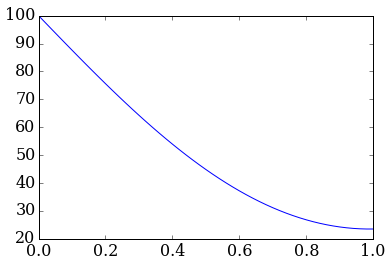

In [146]:
pyplot.plot(numpy.linspace(0,1,nx), T)

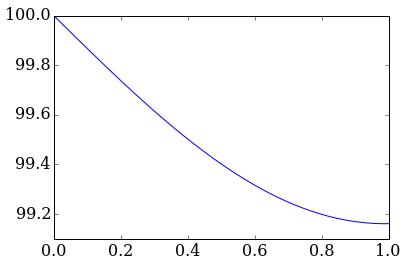

In [147]:
sigma = 5     #Test since this has an alpha that violates the explicit stability scheme

A = generateMatrix(nx, sigma)

T = implicit_ftcs(Ti.copy(), A, nt, sigma, qdx)

pyplot.plot(numpy.linspace(0,1,nx), T)

large sigma refers to a large timestep

so now we can choose our own timestep